# Assignment-1 - Data Preprocessing

**Submitted By: Abdul Manaf**

**Class:** MSCS-2

**CMS ID:** 221-24-0012

**Email:** abdulmanaf.mscss24@iba-suk.edu.pk


# Supermarket Sales Data Analysis

This dataset contains historical sales data from a supermarket company, covering three different branches across a three-month period. The data captures a detailed record of various transactions that occurred during this time, including information such as product line, quantity purchased, customer type, payment method, and other relevant metrics like sales, gross income, and customer rating. This rich dataset is well-suited for a wide range of analyses, including exploratory data analysis, trend identification, customer behavior analysis, and predictive modeling.

* Dataset Overview

The dataset represents sales data collected from three branches of a supermarket company, recorded over a period of three months. This period includes transactions across various product lines, providing insights into the preferences and behaviors of different customer types. The goal of this dataset is to provide a comprehensive view of the business operations at each branch, facilitating a deeper understanding of customer purchasing behavior and financial performance.

##### Key attributes of this dataset include:

1. Branch: Identifier for the three branches where data was collected.
2. City: Indicates the city where each branch is located.
3. Customer Type: Categorizes customers as "Members" or "Normal" to reflect loyalty.
4. Gender: Gender of the customers making purchases.
5. Product Line: The category of products purchased, which includes different departments like health and beauty, electronics, groceries, etc.
6. Unit Price: Price per unit of product purchased.
7. Quantity: Number of units purchased per transaction.
8. Tax 5%: Amount of tax applied to the purchase.
9. Total Sales: Total amount of sales, including tax.
10. Payment Method: Payment method used by customers, including cash, credit card, or electronic transfer.
11. COGS (Cost of Goods Sold): The cost associated with the products sold during each transaction.
12. Gross Margin Percentage: Indicates the margin percentage for each product sold, which is fixed.
13. Gross Income: Represents the profit made per transaction after accounting for the COGS.
14. Customer Rating: Customer feedback regarding the transaction, rated on a scale.

##### Motivation for Analysis

The rapid growth of supermarket chains in densely populated urban areas has led to increased competition. This dataset aims to help analysts and data scientists explore historical sales trends, identify opportunities for increasing efficiency, and develop predictive models that could potentially guide decision-making for inventory management, marketing strategies, and customer satisfaction initiatives.

The dataset can also be used to answer specific business questions such as:

* Which product lines generate the highest revenue across different branches?
* Is there a noticeable difference in spending behavior between members and normal customers?
* How do sales vary across different branches and cities?
* What factors influence customer satisfaction and ratings?

##### Applications of the Dataset

This dataset lends itself well to a variety of analytical applications, including but not limited to:
* Exploratory Data Analysis (EDA): Investigate relationships between product lines, sales, and customer demographics.
* Predictive Analytics: Create models to predict future sales, gross income, or even customer satisfaction based on historical data.
* Business Insights: Gain insights into branch-level performance, customer preferences, seasonal variations in demand, and optimize marketing strategies.
* Data Visualization: Utilize libraries such as Seaborn and Matplotlib to create insightful visualizations that reveal underlying patterns and trends in the data.

##### Purpose

This dataset is ideal for learning and demonstrating various data analytics techniques, from simple descriptive statistics to complex predictive modeling. It provides an opportunity for individuals and organizations to understand supermarket sales dynamics, develop actionable insights, and make data-driven decisions to improve performance.

Source of the Dataset: https://github.com/sushantag9/Supermarket-Sales-Data-Analysis

# Import libraries and Load dataset

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

In [40]:
file_path = '/content/drive/MyDrive/Masters/2nd Semester/Advanced Machine Learning/Codes/Projects/#1 Project-1/SuperMarket Analysis.csv'
data = pd.read_csv(file_path)
data.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4


# Step-1: Prepeocessing

## Convert 'Date' column to datetime format

In [41]:
data['Date'] = pd.to_datetime(data['Date'])

data['Month'] = data['Date'].dt.month
data['Weekday'] = data['Date'].dt.day_name()

data.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Weekday
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1,1,Saturday
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6,3,Friday
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4,3,Sunday


## Dropping unnecessary columns

In [42]:
data.drop(['Invoice ID', 'Date', 'Time', 'gross margin percentage'], axis=1, inplace=True)

# Step-2: Exploratory Data Analysis (EDA) Data Visualization

## Summary Statistics for Numerical Columns

In [43]:
print("Summary Statistics for Numerical Columns:")
data.describe()

Summary Statistics for Numerical Columns:


,Unit price,Quantity,Tax 5%,Sales,cogs,gross income,Rating,Month
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,15.379369,6.97270,1.993000
std,26.494628,2.923431,11.708825,245.885335,234.17651,11.708825,1.71858,0.835254
min,10.080000,1.000000,0.508500,10.678500,10.17000,0.508500,4.00000,1.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,5.924875,5.50000,1.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,12.088000,7.00000,2.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,22.445250,8.50000,3.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,49.650000,10.00000,3.000000


## Plotting skewness of numerical columns

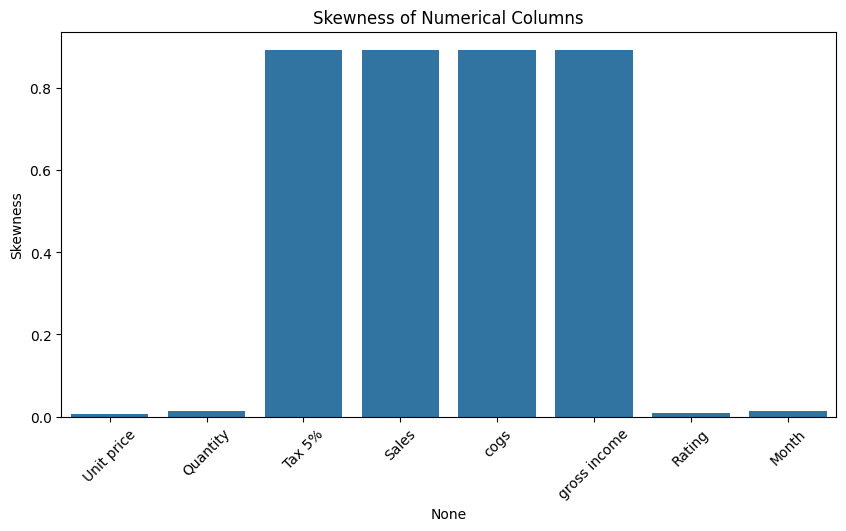

In [44]:
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
skewness_values = data[numerical_columns].skew()
plt.figure(figsize=(10, 5))
sns.barplot(x=skewness_values.index, y=skewness_values.values)
plt.xticks(rotation=45)
plt.title('Skewness of Numerical Columns')
plt.ylabel('Skewness')
plt.show()

## Checking for Missing Values

In [45]:
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Tax 5%           0
Sales            0
Payment          0
cogs             0
gross income     0
Rating           0
Month            0
Weekday          0
dtype: int64


## Distribution of Categorical Features

In [46]:
categorical_cols = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment', 'Weekday']
for col in categorical_cols:
    print(f"\nValue Counts for Column {col}:")
    print(data[col].value_counts())


Value Counts for Column Branch:
Branch
Alex     340
Cairo    332
Giza     328
Name: count, dtype: int64

Value Counts for Column City:
City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

Value Counts for Column Customer type:
Customer type
Member    565
Normal    435
Name: count, dtype: int64

Value Counts for Column Gender:
Gender
Female    571
Male      429
Name: count, dtype: int64

Value Counts for Column Product line:
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

Value Counts for Column Payment:
Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

Value Counts for Column Weekday:
Weekday
Saturday     164
Tuesday      158
Wednesday    143
Friday       139
Thursday     138
Sunday       133
Monday       125
Name: count, dtype: int64


## Plotting distributions of categorical features

<ipython-input-47-ddbc4e89b09d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis')
<ipython-input-47-ddbc4e89b09d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis')
<ipython-input-47-ddbc4e89b09d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], palette='viridis')
<ipython-input-47-ddbc4e89b09d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same

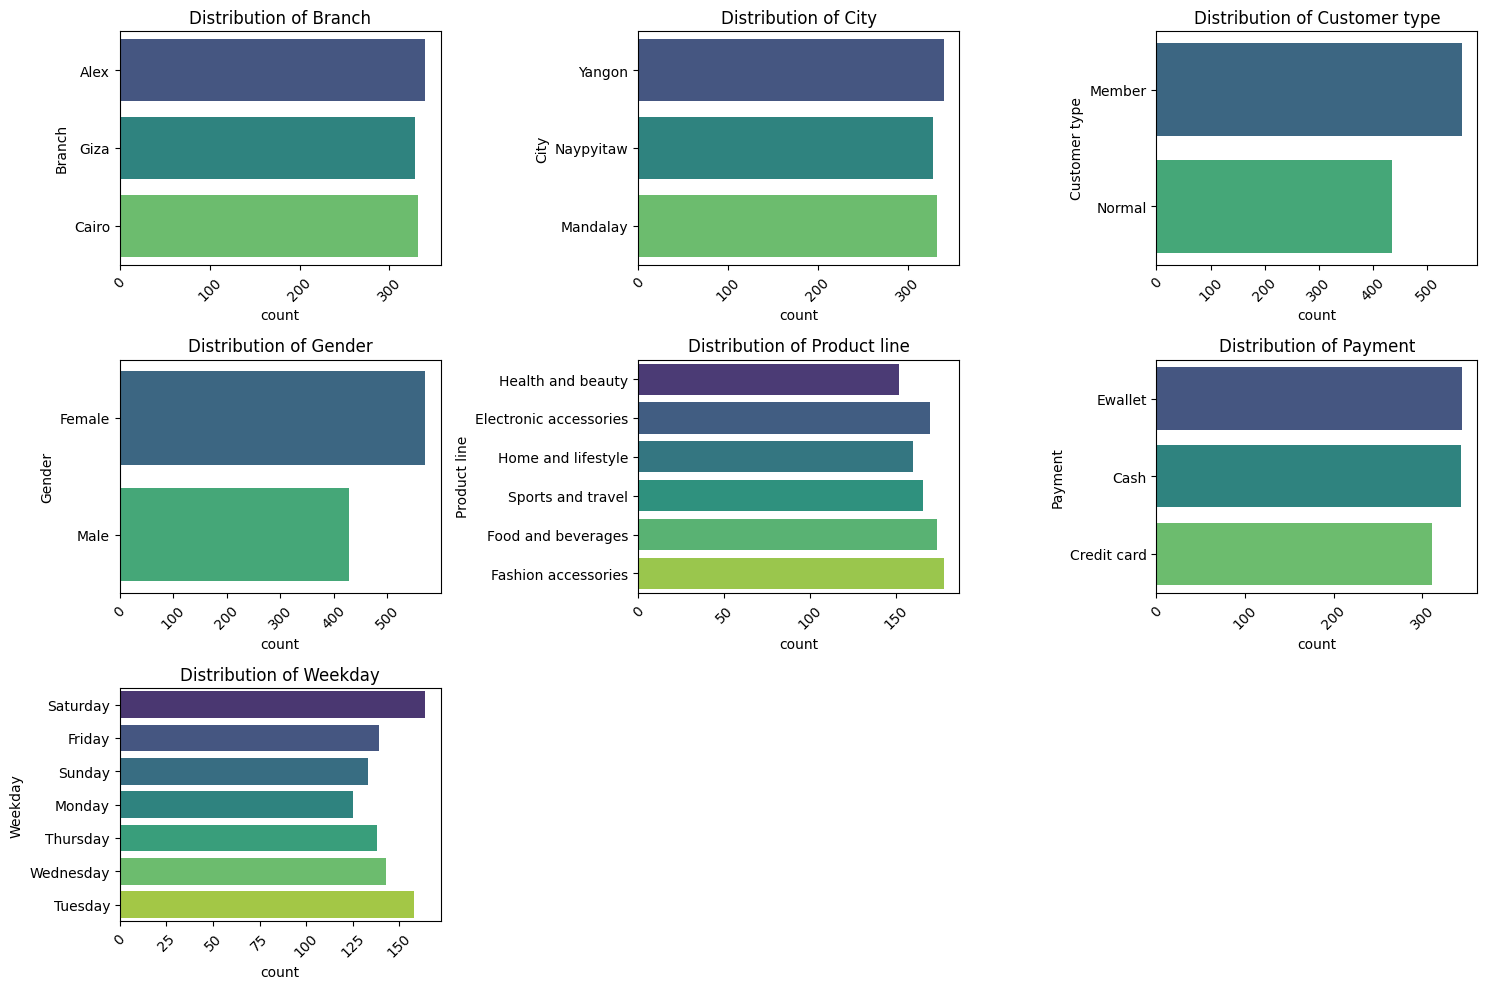

In [47]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(data[col], palette='viridis')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Sales Trends by Weekday and Hour

<ipython-input-48-cbf0231c0135>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weekday', y='Sales', data=data, palette='Set2')


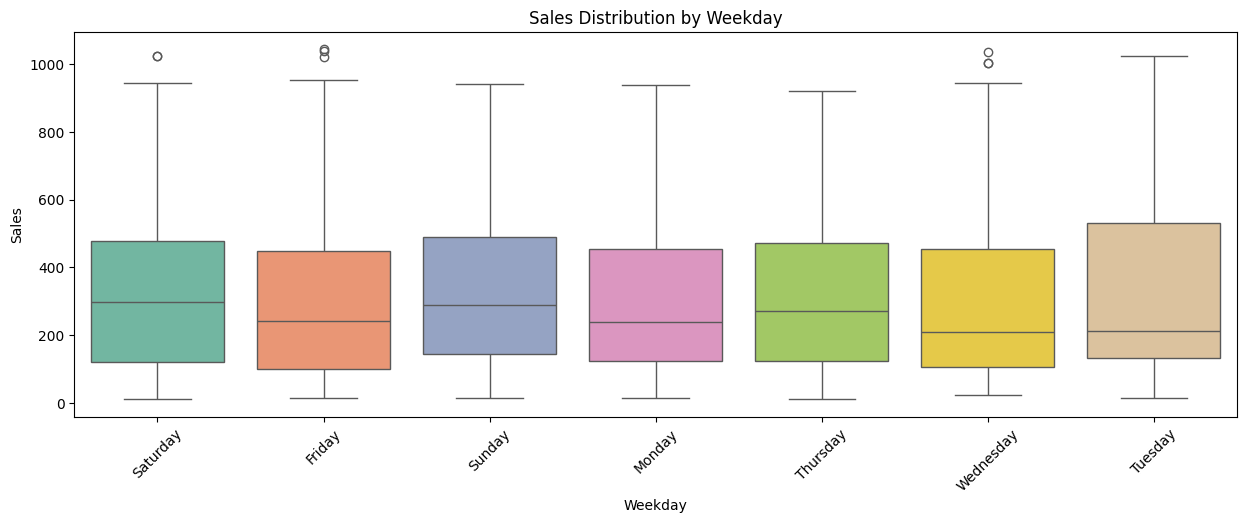

<ipython-input-48-cbf0231c0135>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Sales', data=data, palette='Set3')


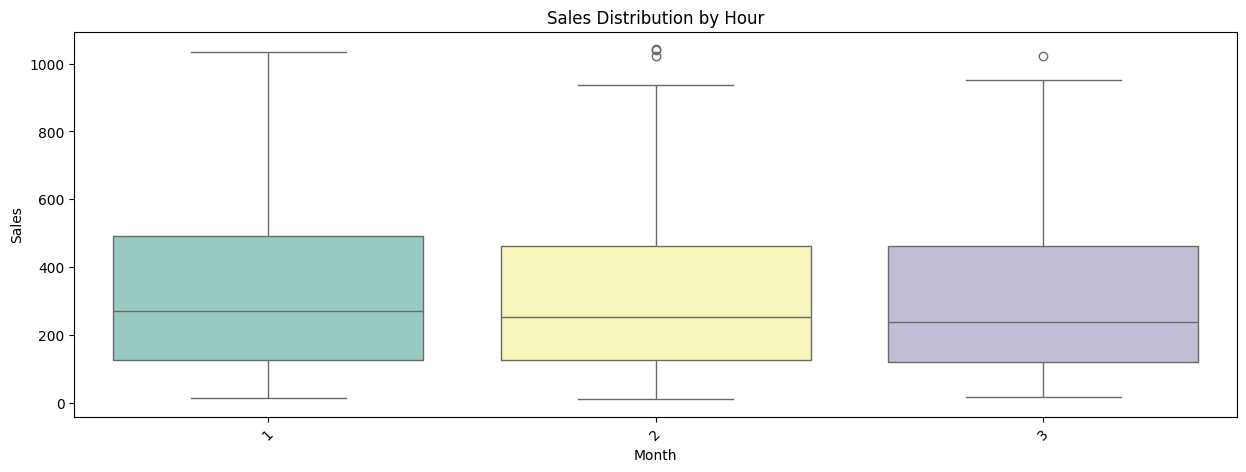

In [48]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='Weekday', y='Sales', data=data, palette='Set2')
plt.title("Sales Distribution by Weekday")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(x='Month', y='Sales', data=data, palette='Set3')
plt.title("Sales Distribution by Hour")
plt.xticks(rotation=45)
plt.show()

## Distribution of Customer Ratings

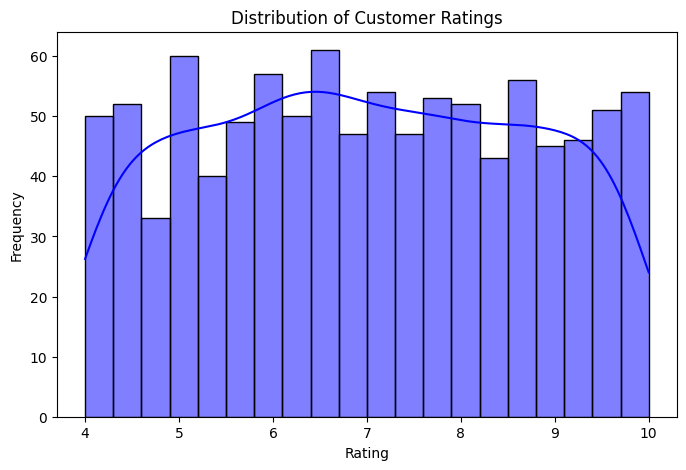

In [49]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Rating'], bins=20, kde=True, color='blue')
plt.title("Distribution of Customer Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# Step-3: Feature Engineering

In [50]:
data['Is_Weekend'] = data['Weekday'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

## Label Encoding for categorical Values

In [51]:
from sklearn.preprocessing import LabelEncoder

columns_to_transform = ['Branch', 'City', 'Customer type', 'Gender', 'Payment', 'Product line', 'Month', 'Weekday']

label_encoders = {}
for col in columns_to_transform:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

## Correlation Heatmap for Numerical Features

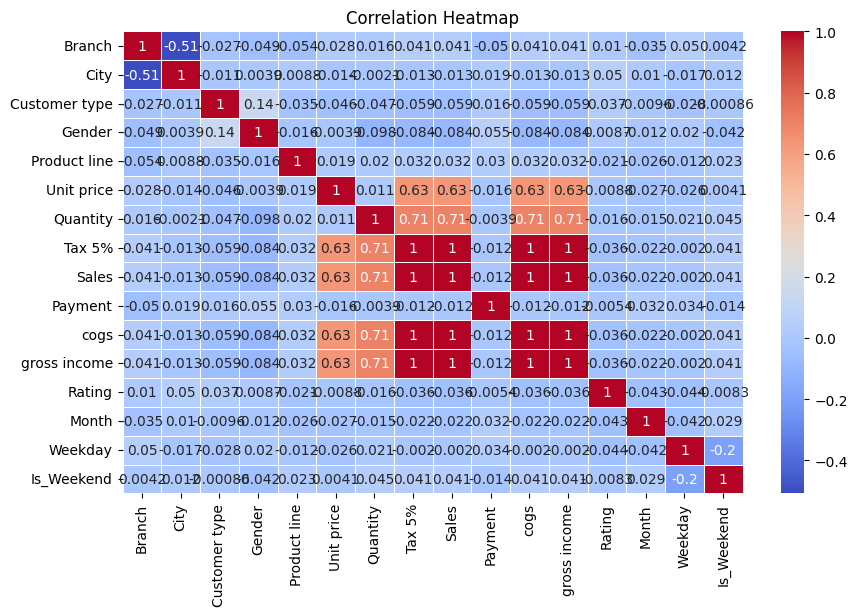

In [52]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Data Normalization ON numerical values

In [53]:
numerical_cols = numerical_columns
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

## Selecting features based on correlation heatmap


In [54]:
corr_matrix = data.corr()
sales_corr = corr_matrix['Sales'].abs().sort_values(ascending=False)
selected_features = sales_corr[sales_corr > 0.2].index.tolist()
selected_features.remove('Sales')
print(selected_features)

['Tax 5%', 'cogs', 'gross income', 'Quantity', 'Unit price']


### Selected Columns

In [55]:
data[selected_features]

,Tax 5%,cogs,gross income,Quantity,Unit price
0,0.521616,0.521616,0.521616,0.666667,0.718847
1,0.067387,0.067387,0.067387,0.444444,0.057855
2,0.319628,0.319628,0.319628,0.666667,0.403316
3,0.463549,0.463549,0.463549,0.777778,0.535603
4,0.604377,0.604377,0.604377,0.666667,0.848131
...,...,...,...,...,...
995,0.030707,0.030707,0.030707,0.000000,0.336782
996,0.980465,0.980465,0.980465,1.000000,0.971295
997,0.022049,0.022049,0.022049,0.000000,0.242101
998,0.056622,0.056622,0.056622,0.000000,0.620160


# Step-4:Regression Model to Predict Sales

### Splitting data into training (70%) and testing (30%)

In [56]:
X = data[selected_features]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Creating model and applying training data

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

linear_regressor = LinearRegression()
tree_regressor = DecisionTreeRegressor(random_state=42)
forest_regressor = RandomForestRegressor(random_state=42, n_estimators=100)

In [58]:
linear_regressor.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
forest_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [59]:
y_pred_linear = linear_regressor.predict(X_test)
y_pred_tree = tree_regressor.predict(X_test)
y_pred_forest = forest_regressor.predict(X_test)

In [60]:
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)

forest_mse = mean_squared_error(y_test, y_pred_forest)
forest_r2 = r2_score(y_test, y_pred_forest)

print("Linear Regression: MSE =", linear_mse, ", R2 =", linear_r2)
print("Decision Tree Regressor: MSE =", tree_mse, ", R2 =", tree_r2)
print("Random Forest Regressor: MSE =", forest_mse, ", R2 =", forest_r2)

Linear Regression: MSE = 2.0468895039806653e-32 , R2 = 1.0
Decision Tree Regressor: MSE = 2.810066587301752e-06 , R2 = 0.9999546125727637
Random Forest Regressor: MSE = 1.9124622129445455e-06 , R2 = 0.9999691104332102


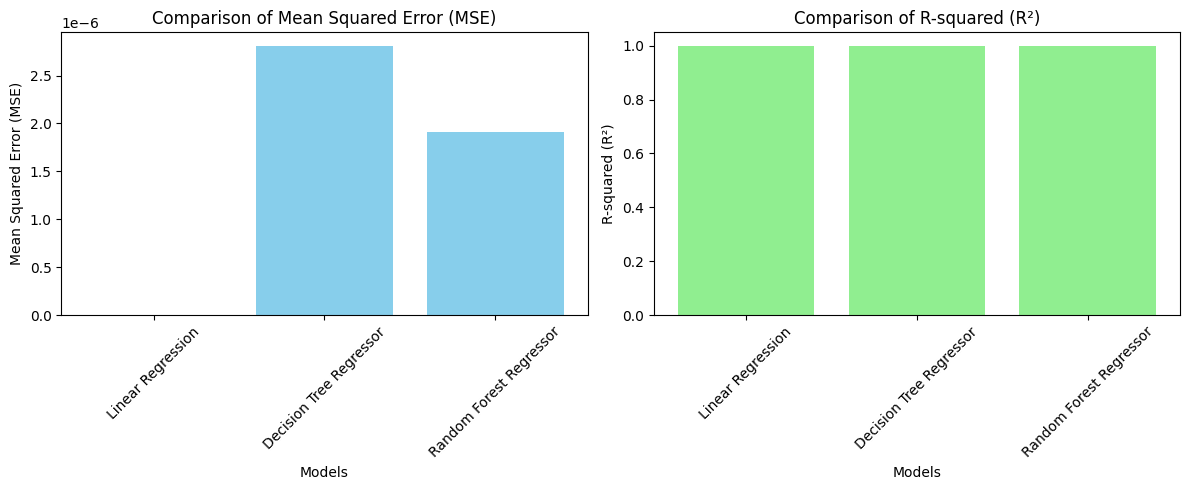

In [61]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor']

mse_values = [linear_mse, tree_mse, forest_mse]
r2_values = [linear_r2, tree_r2, forest_r2]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('R-squared (R²)')
plt.title('Comparison of R-squared (R²)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Step-5: Making noisy data

In [62]:
df_noisy = pd.concat([data[selected_features], data['Sales']], axis=1)

## 1. Add random NaN values to the DataFrame

In [63]:
nan_fraction = 0.05
nan_indices = [(row, col) for row in range(df_noisy.shape[0]) for col in range(df_noisy.shape[1])]
nan_sample = np.random.choice(len(nan_indices), size=int(len(nan_indices) * nan_fraction), replace=False)

for idx in nan_sample:
    row, col = nan_indices[idx]
    df_noisy.iat[row, col] = np.nan

## 2. Add random zero values to the DataFrame

In [64]:
zero_fraction = 0.05
zero_indices = [(row, col) for row in range(df_noisy.shape[0]) for col in range(df_noisy.shape[1])]
zero_sample = np.random.choice(len(zero_indices), size=int(len(zero_indices) * zero_fraction), replace=False)

for idx in zero_sample:
    row, col = zero_indices[idx]
    df_noisy.iat[row, col] = 0

## 3. Add random noise to numeric columns

In [65]:
noise_fraction = 0.1
numeric_cols = df_noisy.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    noise = np.random.normal(0, df_noisy[col].std() * 0.1, size=df_noisy[col].shape)
    df_noisy[col] = df_noisy[col] + noise * (np.random.rand(len(df_noisy)) < noise_fraction)

df_noisy.fillna(df_noisy.mean(), inplace=True)

### 4. Data Simple EDA

In [66]:
print("Summary Statistics for Numerical Columns:")
df_noisy.describe()

Summary Statistics for Numerical Columns:


,Tax 5%,cogs,gross income,Quantity,Unit price,Sales
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.288602,0.290373,0.284401,0.472430,0.479259,0.290210
std,0.239247,0.233893,0.234714,0.330399,0.300316,0.235852
min,-0.042472,-0.039644,-0.020397,-0.034292,-0.026024,-0.025878
25%,0.089448,0.099439,0.090183,0.222222,0.212756,0.096357
50%,0.236348,0.244468,0.235147,0.444444,0.479259,0.236913
75%,0.427116,0.418824,0.416173,0.777778,0.723353,0.428640
max,1.000000,0.996744,1.000000,1.081338,1.016792,1.000000


In [67]:
X = df_noisy[selected_features]
y = df_noisy['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

linear_regressor = LinearRegression()
tree_regressor = DecisionTreeRegressor(random_state=42)
forest_regressor = RandomForestRegressor(random_state=42, n_estimators=100)

In [69]:
linear_regressor.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
forest_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [70]:
y_pred_linear = linear_regressor.predict(X_test)
y_pred_tree = tree_regressor.predict(X_test)
y_pred_forest = forest_regressor.predict(X_test)

In [71]:
linear_mse_1 = mean_squared_error(y_test, y_pred_linear)
linear_r2_1 = r2_score(y_test, y_pred_linear)

tree_mse_1 = mean_squared_error(y_test, y_pred_tree)
tree_r2_1 = r2_score(y_test, y_pred_tree)

forest_mse_1 = mean_squared_error(y_test, y_pred_forest)
forest_r2_1 = r2_score(y_test, y_pred_forest)

print("Linear Regression: MSE =", linear_mse, ", R2 =", linear_r2_1)
print("Decision Tree Regressor: MSE =", tree_mse, ", R2 =", tree_r2_1)
print("Random Forest Regressor: MSE =", forest_mse, ", R2 =", forest_r2_1)

Linear Regression: MSE = 2.0468895039806653e-32 , R2 = 0.8380723822446803
Decision Tree Regressor: MSE = 2.810066587301752e-06 , R2 = 0.7010126360371592
Random Forest Regressor: MSE = 1.9124622129445455e-06 , R2 = 0.8532187241519165


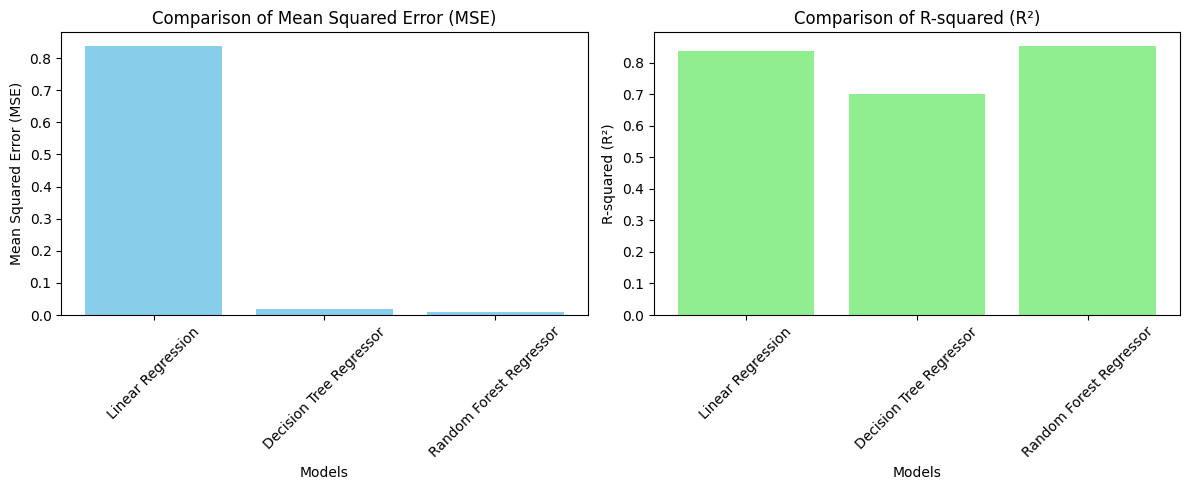

In [72]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor']

mse_values_1 = [linear_r2_1, tree_mse_1, forest_mse_1]
r2_values_1 = [linear_r2_1, tree_r2_1, forest_r2_1]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(models, mse_values_1, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(models, r2_values_1, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('R-squared (R²)')
plt.title('Comparison of R-squared (R²)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Step-6: Comparative results

In [73]:
results_data = {
    'Model': models,
    'MSE (Data-1: Original)': mse_values,
    'R² (Data-1: Original)': r2_values,
    'MSE (Data-2: Noisy)': mse_values_1,
    'R² (Data-2: Noisy)': r2_values_1
}
results_df = pd.DataFrame(results_data)

print("Comparative Study of Model Performance on Original and Noisy Data:\n")
print(results_df.to_string(index=False))

Comparative Study of Model Performance on Original and Noisy Data:

                  Model  MSE (Data-1: Original)  R² (Data-1: Original)  MSE (Data-2: Noisy)  R² (Data-2: Noisy)
      Linear Regression            2.046890e-32               1.000000             0.838072            0.838072
Decision Tree Regressor            2.810067e-06               0.999955             0.017989            0.701013
Random Forest Regressor            1.912462e-06               0.999969             0.008831            0.853219


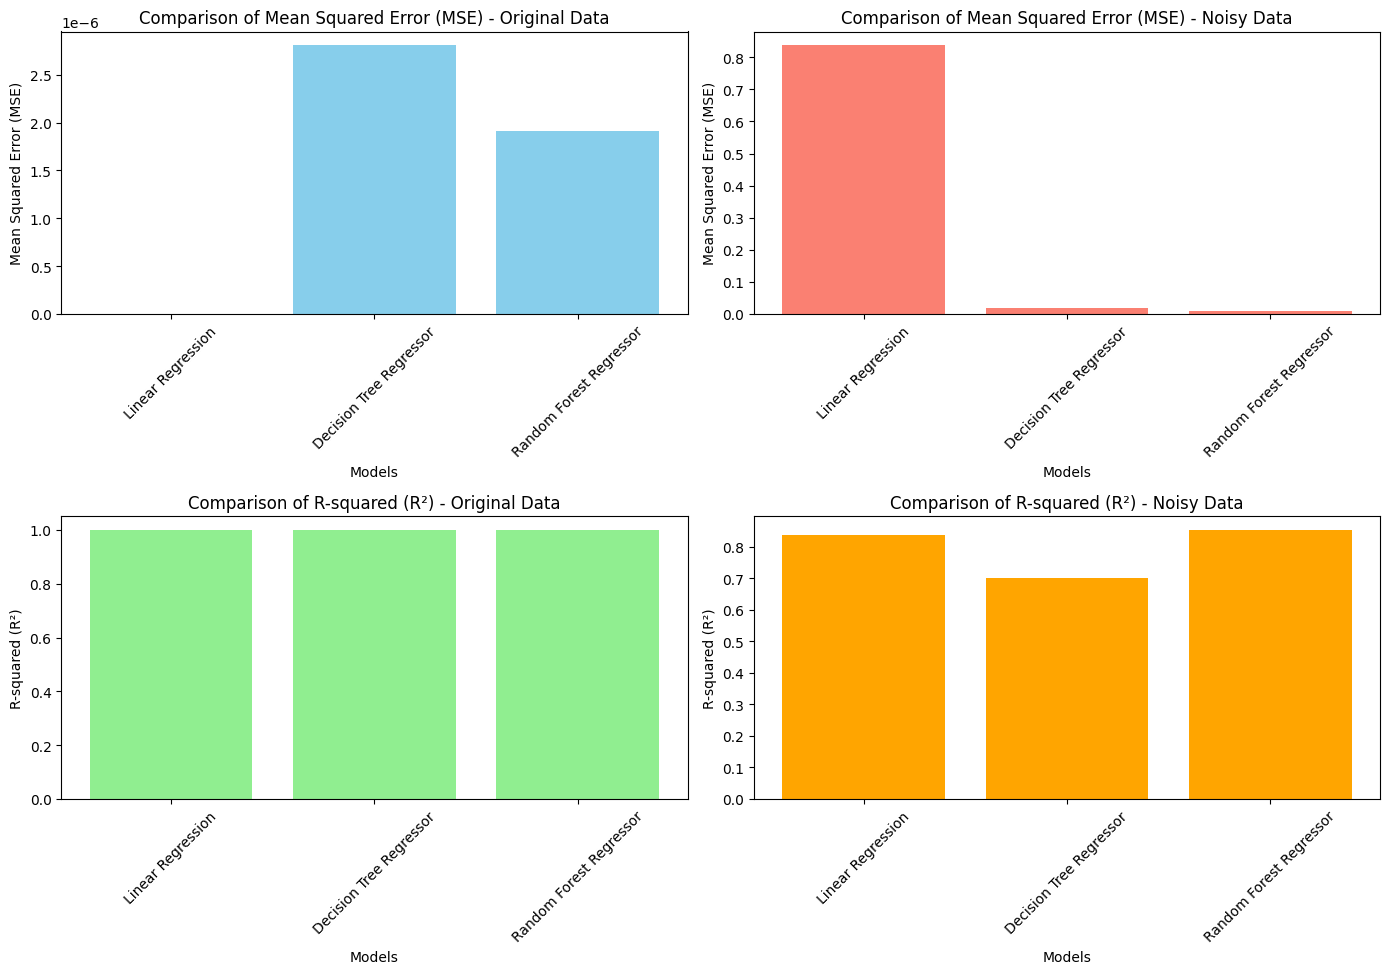

In [74]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.bar(models, mse_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) - Original Data')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.bar(models, mse_values_1, color='salmon')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) - Noisy Data')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
plt.bar(models, r2_values, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('R-squared (R²)')
plt.title('Comparison of R-squared (R²) - Original Data')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
plt.bar(models, r2_values_1, color='orange')
plt.xlabel('Models')
plt.ylabel('R-squared (R²)')
plt.title('Comparison of R-squared (R²) - Noisy Data')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()